In [38]:
import dao
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd
from matplotlib.path import Path
import matplotlib.patches as patches

## Format Data
* The original data was in Json format, we need to transform them into pandas DataFrame
* This is just a function definition, we will use it later 

In [6]:
def jsonListToDF(jsonList, dataType):
    data = [json[dataType] for json in jsonList]
    df_data = pd.read_json(json.dumps(data)) 
    return df_data


# Parking Spaces
Let's first look at Parking Space API
* I created a file called 'dao.py' in the backend, which is responsible for calling the CDP REST API to get Json data. 
* Transform data from Json to DataFrame
* Flat data: because Json has more complex data structure than DataFrame, we need to flat the data with less hierarchy

## Parking Spaces DataFrame
* Have a peek of data frame, so we can understand the data better. 
* We only have 4 parking spaces, not that complicated. 
* retrieve geoPoint from boundary, which tells the 4 boundary points of each parking space

In [190]:
# do some analylsis on Sparking Spaces
spaces = dao.getAllParkingSpaces()
print("We totally have %s Parking Spaces" % len(spaces)) 
df_spaces = jsonListToDF(spaces, 'ParkingSpace') # Transform data from Json to DataFrame
df_spaces['total'] = [state['total'] for state in df_spaces['state']] # Flat data 
df_spaces['geoPoint'] = [boundary['geoPoint'] for boundary in df_spaces['boundary']]
del df_spaces['boundary']
df_spaces


Requesting **Real Time Data** (http://10.10.20.6/apigw/devnetlabapi/cdp/v1/devices/parking?UserKey=500103&SensorCustomerKey=500050&AppKey=CDP-App)

We totally have 4 Parking Spaces


,demarcated,hierId,label,opParams,providerDetails,sensorCustomerId,sid,state,thirdPartyId,total,geoPoint
0,True,parking_hierarchy_sid,Space Bell Zone 001,{'zoneType': 'ValidParking'},{'providerId': 'kvt7gvsfwkqoa2wikma5btvdz3lnqk...,SDPCustomer_500050,Simulated__DEVNET002__spacez Bell 001,"{'total': 0, 'floating': 0, 'occupied': 0}",spacez Bell 001,0,"[{'longitude': None, 'latitude': None}, {'long..."
1,True,parking_hierarchy_sid,Space Zone 001,"{'parkingRate': {'durationMinutes': 60, 'fareP...",{'providerId': 'kvt7gvsfwkqoa2wikma5btvdz3lnqk...,SDPCustomer_500050,Simulated__DEVNET002__spacez001,"{'total': 20, 'floating': 0, 'occupied': 0}",spacez001,20,"[{'longitude': -121.9250196, 'latitude': 37.40..."
2,True,parking_hierarchy_sid,Space Zone 002,{'zoneType': 'ValidParking'},{'providerId': 'kvt7gvsfwkqoa2wikma5btvdz3lnqk...,SDPCustomer_500050,Simulated__DEVNET002__spacez002,"{'total': 20, 'floating': 0, 'occupied': 0}",spacez002,20,"[{'longitude': 77.02938509, 'latitude': 28.456..."
3,True,parking_hierarchy_sid,SpaceBellZone001,{'zoneType': 'ValidParking'},{'providerId': 'kvt7gvsfwkqoa2wikma5btvdz3lnqk...,SDPCustomer_500050,Simulated__DEVNET002__spacezBell001,"{'total': 30, 'floating': 0, 'occupied': 0}",spacezBell001,30,"[{'longitude': -113.6195862, 'latitude': 53.52..."


## How Many Parking Spots in Each Parking Space?
One of the parking spaces has no parking spot, we can ignore it later

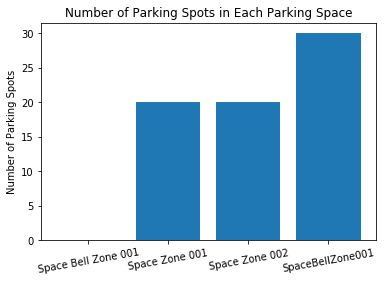

In [8]:
y_pos = np.arange(len(df_spaces['total']))
plt.bar(y_pos, df_spaces['total'])
plt.xticks(y_pos, df_spaces['label'])
plt.xticks(rotation=10)
plt.ylabel('Number of Parking Spots')
plt.title("Number of Parking Spots in Each Parking Space")
plt.show()

## Geography Boundaries for each Parking Space

In [168]:
def drawParkingSpace(points, ax, alpha=0.6):
    verts = []
    for point in points:
        verts.append((point['longitude'],point['latitude']))
    verts.append((0,0))

    codes = [Path.MOVETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.CLOSEPOLY,
             ]
    path = Path(verts, codes)
    patch = patches.PathPatch(path, facecolor='orange', lw=1, alpha=alpha)
    ax.add_patch(patch)

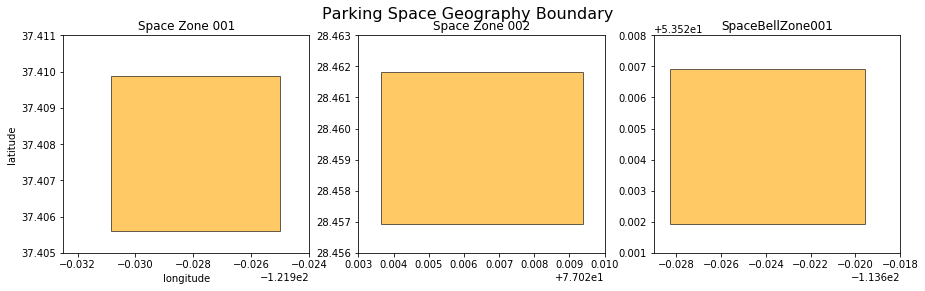

In [167]:
fig = plt.figure(figsize=(15,4))
fig.suptitle('Parking Space Geography Boundary', fontsize=16)

ax = fig.add_subplot(131)
drawParkingSpace(df_spaces['geoPoint'][1], ax)
ax.set_xlim([-121.9325,-121.924])
ax.set_ylim([37.405,37.411])
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_title('Space Zone 001')

ax = fig.add_subplot(132)
drawParkingSpace(df_spaces['geoPoint'][2], ax)
ax.set_xlim([77.023,77.03])
ax.set_ylim([28.456,28.463])
ax.set_title('Space Zone 002')

ax = fig.add_subplot(133)
drawParkingSpace(df_spaces['geoPoint'][3], ax)
ax.set_xlim([-113.629,-113.618])
ax.set_ylim([53.521,53.528])
ax.set_title('SpaceBellZone001')

plt.show()

# Parking Spots

In [102]:
def flatDF(df):
    df['longitude'] = [geo['longitude'] for geo in df['geocoordinates']]
    df['latitude'] = [geo['latitude'] for geo in df['geocoordinates']]
    del df['geocoordinates']

## Parking Spots Data
Pay attention how I changed **geocoordinates** to **longitude** and **latitude**

In [11]:
spots = dao.getAllParkingSpots()
df_spots = jsonListToDF(spots, 'ParkingSpot') # [spot['ParkingSpot'] for spot in spots]
flatDF(df_spots)
print("We totally have %s Parking Spots" % len(df_spots)) 
df_spots.head()


Requesting **Real Time Data** (http://10.10.20.6/apigw/devnetlabapi/cdp/v1/devices/parking?UserKey=500103&SensorCustomerKey=500050&AppKey=CDP-App)

We totally have 70 Parking Spots


,ancestor,geocoordinates,hierId,label,lastUpdated,opParams,parent,parkingSpaceId,providerDetails,sensorCustomerId,sid,state,thirdPartyId,longitude,latitude
0,[{'entityId': 'Simulated__DEVNET002__spacez001...,"{'longitude': -121.9279211, 'latitude': 37.406...",parking_hierarchy_sid,PT001_001,2016-11-25T09:20:00.025Z,"{'zoneType': 'ValidParking', 'maxDurationMinut...","{'entityType': 'ParkingSpace', 'entityId': 'Si...",Simulated__DEVNET002__spacez001,"{'provider': 'simulated', 'providerId': 'kvt7g...",SDPCustomer_500050,Simulated__DEVNET002__pspotz001n001,"{'reliability': 100.0, 'prevExpectedRevenue': ...",pspotz001n001,-121.927921,37.406349
1,[{'entityId': 'Simulated__DEVNET002__spacez001...,"{'longitude': -121.9301719, 'latitude': 37.408...",parking_hierarchy_sid,PT001_002,2016-10-31T10:11:24.476Z,"{'zoneType': 'ValidParking', 'maxDurationMinut...","{'entityType': 'ParkingSpace', 'entityId': 'Si...",Simulated__DEVNET002__spacez001,"{'provider': 'simulated', 'providerId': 'kvt7g...",SDPCustomer_500050,Simulated__DEVNET002__pspotz001n002,"{'reliability': 100.0, 'occupied': True}",pspotz001n002,-121.930172,37.408702
2,[{'entityId': 'Simulated__DEVNET002__spacez001...,"{'longitude': -121.926456, 'latitude': 37.4073...",parking_hierarchy_sid,PT001_003,2016-10-31T10:11:24.476Z,"{'zoneType': 'ValidParking', 'maxDurationMinut...","{'entityType': 'ParkingSpace', 'entityId': 'Si...",Simulated__DEVNET002__spacez001,"{'provider': 'simulated', 'providerId': 'kvt7g...",SDPCustomer_500050,Simulated__DEVNET002__pspotz001n003,"{'reliability': 100.0, 'occupied': False}",pspotz001n003,-121.926456,37.407389
3,[{'entityId': 'Simulated__DEVNET002__spacez001...,"{'longitude': -121.9275247, 'latitude': 37.408...",parking_hierarchy_sid,PT001_004,2016-10-31T10:11:24.476Z,"{'zoneType': 'ValidParking', 'maxDurationMinut...","{'entityType': 'ParkingSpace', 'entityId': 'Si...",Simulated__DEVNET002__spacez001,"{'provider': 'simulated', 'providerId': 'kvt7g...",SDPCustomer_500050,Simulated__DEVNET002__pspotz001n004,"{'reliability': 100.0, 'occupied': False}",pspotz001n004,-121.927525,37.408549
4,[{'entityId': 'Simulated__DEVNET002__spacez001...,"{'longitude': -121.9251549, 'latitude': 37.407...",parking_hierarchy_sid,PT001_005,2016-10-31T10:11:24.476Z,"{'zoneType': 'ValidParking', 'maxDurationMinut...","{'entityType': 'ParkingSpace', 'entityId': 'Si...",Simulated__DEVNET002__spacez001,"{'provider': 'simulated', 'providerId': 'kvt7g...",SDPCustomer_500050,Simulated__DEVNET002__pspotz001n005,"{'reliability': 100.0, 'occupied': False}",pspotz001n005,-121.925155,37.407965


## How Many of these Parking Spots are Occupied?
only two of them are occupied, actually I called API from our CDP Parking Demo to make them occupied. 

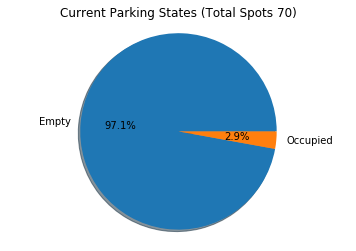

In [12]:
labels = ['Empty', 'Occupied']
values = [0,0]

for r in spots:
    if 'ParkingSpot' in r:
        spot = r['ParkingSpot']
        # we now have an instance of a Smart+Connected Digital Platform light model
        # get the 'state' object
        # this contains 'intensityLevel', 'powerConsumption' and 'reliability'
        if spot['state']:
            state = spot['state']
        # increment the values array
        if state['occupied'] == False:
            values[0] = values[0] + 1
        else:
            values[1] = values[1] + 1
            
plt.pie(values, labels=labels, autopct='%1.1f%%', shadow=True)
# make the graph a circle (not setting this can result an an elipsis)
plt.axis('equal')
# set the title of the plot and add some additional information - the total number of lights
plt.title('Current Parking States (Total Spots '+ str(values[0] + values[1]) + ')')
# show the graph
plt.show()

## How these 70 Parking Spots spread in 3 Parking Spaces

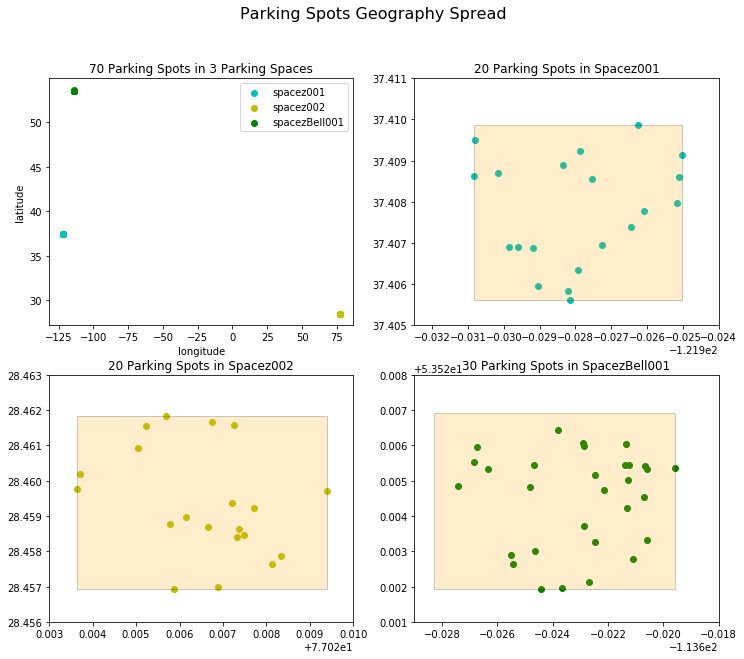

In [130]:
# scatter plot 70 spots in 4 parking spaces according to coordicates
df_space1 = df_spots[df_spots['parkingSpaceId'] == 'Simulated__DEVNET002__spacez001']
df_space2 = df_spots[df_spots['parkingSpaceId'] == 'Simulated__DEVNET002__spacez002']
df_spaceB1 = df_spots[df_spots['parkingSpaceId'] == 'Simulated__DEVNET002__spacezBell001']

fig, axes = plt.subplots(2, 2, figsize=(12,10))
fig.suptitle('Parking Spots Geography Spread', fontsize=16)

axes[0,0].scatter(df_space1['longitude'], df_space1['latitude'], label='spacez001', color='c')
axes[0,0].scatter(df_space2['longitude'], df_space2['latitude'], label='spacez002', color='y')
axes[0,0].scatter(df_spaceB1['longitude'], df_spaceB1['latitude'], label='spacezBell001', color='g')
axes[0,0].legend()
axes[0,0].set_xlabel('longitude')
axes[0,0].set_ylabel('latitude')
axes[0,0].set_title('70 Parking Spots in 3 Parking Spaces')

axes[0,1].scatter(df_space1['longitude'], df_space1['latitude'], color='c')
axes[0,1].set_title('20 Parking Spots in Spacez001')
axes[0,1].set_xlim([-121.9325,-121.924]) 
axes[0,1].set_ylim([37.405,37.411]) 
drawParkingSpace(df_spaces['geoPoint'][1], axes[0,1], 0.2)

axes[1,0].scatter(df_space2['longitude'], df_space2['latitude'], color='y')
axes[1,0].set_title('20 Parking Spots in Spacez002')
axes[1,0].set_xlim([77.023,77.03])
axes[1,0].set_ylim([28.456,28.463])
drawParkingSpace(df_spaces['geoPoint'][2], axes[1,0], 0.2)

axes[1,1].scatter(df_spaceB1['longitude'], df_spaceB1['latitude'], color='g')
axes[1,1].set_title('30 Parking Spots in SpacezBell001')
axes[1,1].set_xlim([-113.629,-113.618])
axes[1,1].set_ylim([53.521,53.528])
drawParkingSpace(df_spaces['geoPoint'][3], axes[1,1], 0.2)

plt.show()

# Environment Sensors
* Environment Sensor data is a little bit more complex. 
* We will see there are 259 sensors in 4 types spread around 3 parking spaces. 

In [131]:
sensors = dao.getAllEnvironmentSensors()
print("We totally have %s Environment Sensors" % len(sensors))

data = [sensor['EnvironmentSensor'] for sensor in sensors]
df_sensors = pd.read_json(json.dumps(data)) 

flatDF(df_sensors)

df_sensors['sensorType'] = [type[0] for type in df_sensors['sensorType']]
df_sensors.head()


Requesting **Real Time Data** (http://10.10.20.6/apigw/devnetlabapi/cdp/v1/devices/environment?UserKey=500103&SensorCustomerKey=500050&AppKey=CDP-App)

We totally have 259 Environment Sensors


,airQuality,ambientLight,ambientNoise,ambientTemperature,deviceType,label,lastUpdated,providerDetails,sensorCustomerId,sensorType,sid,thirdPartyId,longitude,latitude
0,"{'reading': {'co2': {'value': 8.0}, 'no2': {'v...",NaN,NaN,NaN,Sensor,AQ1,2017-01-10T13:11:34.878Z,"{'provider': 'simulator', 'providerId': 'udvdd...",SDPCustomer_500050,AirQuality,Simulated__DEVNET002__AQ1,AQ1,-121.947893,37.402352
1,"{'reading': {'co2': {'value': 2.0}, 'no2': {'v...",NaN,NaN,NaN,Sensor,AQ10,2017-01-10T13:11:34.878Z,"{'provider': 'simulator', 'providerId': 'udvdd...",SDPCustomer_500050,AirQuality,Simulated__DEVNET002__AQ10,AQ10,-121.939693,37.418143
2,"{'reading': {'co2': {'value': 5.0}, 'no2': {'v...",NaN,NaN,NaN,Sensor,AQ11,2017-01-10T13:11:34.878Z,"{'provider': 'simulator', 'providerId': 'udvdd...",SDPCustomer_500050,AirQuality,Simulated__DEVNET002__AQ11,AQ11,-121.943929,37.398077
3,"{'reading': {'co2': {'value': 1.0}, 'no2': {'v...",NaN,NaN,NaN,Sensor,AQ12,2017-01-10T13:11:34.878Z,"{'provider': 'simulator', 'providerId': 'udvdd...",SDPCustomer_500050,AirQuality,Simulated__DEVNET002__AQ12,AQ12,-121.923485,37.402594
4,"{'reading': {'co2': {'value': 1.0}, 'no2': {'v...",NaN,NaN,NaN,Sensor,AQ13,2017-01-10T13:11:34.878Z,"{'provider': 'simulator', 'providerId': 'udvdd...",SDPCustomer_500050,AirQuality,Simulated__DEVNET002__AQ13,AQ13,-121.929676,37.403726


## How many Sensors in each Sensor Type

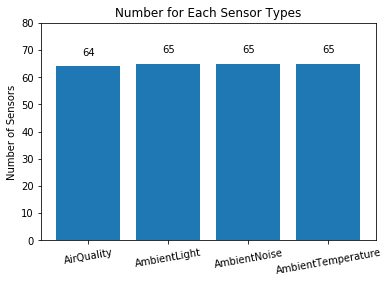

In [16]:
# plt.hist(df_data['sensorType'].values)
unique, counts = np.unique(df_sensors['sensorType'].values, return_counts=True)
rects = plt.bar(range(len(unique)), counts)
plt.xticks(range(len(unique)), unique)
plt.xticks(rotation=10)
plt.ylabel('Number of Sensors')
plt.title("Number for Each Sensor Types")
axes = plt.gca()
axes.set_ylim([0,80])
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects)
plt.show()

## How These Sensors spread around Parkinig Spaces
* At the begining, I saw no sensors around Spacez001. 
* During the analysis, I found out that the sensors around Spacez001 are more widely spread. 
* So I zoomed out the area around Spacez001, then we can see a lot of them! 

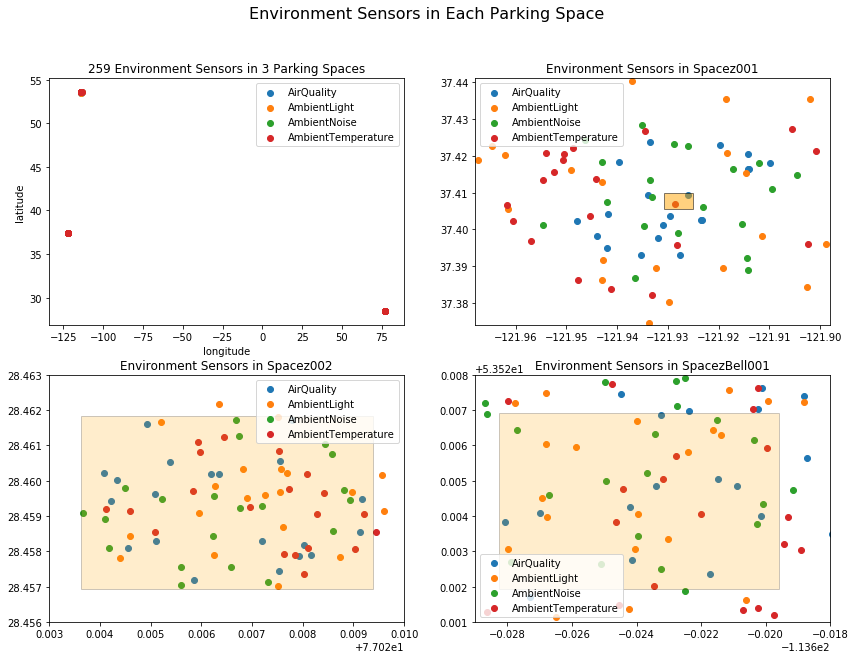

In [175]:
groups = df_sensors.groupby('sensorType')

fig, axes = plt.subplots(2, 2, figsize=(14,10))
fig.suptitle('Environment Sensors in Each Parking Space', fontsize=16)

for name, group in groups:
    axes[0,0].scatter(group['longitude'], group['latitude'], label=name)
axes[0,0].legend()
axes[0,0].set_title('259 Environment Sensors in 3 Parking Spaces')
axes[0,0].set_xlabel('longitude')
axes[0,0].set_ylabel('latitude')

for name, group in groups:
    axes[0,1].scatter(group['longitude'], group['latitude'], label=name)
axes[0,1].set_xlim([-121.968,-121.898])
axes[0,1].set_ylim([37.374,37.441]) 
axes[0,1].legend()
axes[0,1].set_title('Environment Sensors in Spacez001')
drawParkingSpace(df_spaces['geoPoint'][1], axes[0,1], 0.5)

for name, group in groups:
    axes[1,0].scatter(group['longitude'], group['latitude'], label=name)
axes[1,0].legend()
axes[1,0].set_xlim([77.023,77.03])
axes[1,0].set_ylim([28.456,28.463])
axes[1,0].set_title('Environment Sensors in Spacez002')
drawParkingSpace(df_spaces['geoPoint'][2], axes[1,0], 0.2)

for name, group in groups:
    axes[1,1].scatter(group['longitude'], group['latitude'], label=name)
axes[1,1].legend()
axes[1,1].set_xlim([-113.629,-113.618])
axes[1,1].set_ylim([53.521,53.528])
axes[1,1].set_title('Environment Sensors in SpacezBell001')
drawParkingSpace(df_spaces['geoPoint'][3], axes[1,1], 0.2)

plt.show()

## AmbientLight Sensors
* Focus on **illuminance**
* I made a Bubble Chart to show the geography and illuminance of the sensors. 
* The bigger the bubble, higher the illuminance value. 

In [153]:
def delNaNColumns(df):
    del df['airQuality']
    del df['ambientLight']
    del df['ambientNoise']
    del df['ambientTemperature']

In [187]:
df_AmbientLight = df_sensors[df_sensors['sensorType']=='AmbientLight']
df_AmbientLight['illuminance'] = [ambientLight['reading']['illuminance']['value'] 
                                  for ambientLight in df_AmbientLight['ambientLight']]
delNaNColumns(df_AmbientLight)
df_AmbientLight.head()

c:\users\jkuang\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,deviceType,label,lastUpdated,providerDetails,sensorCustomerId,sensorType,sid,thirdPartyId,longitude,latitude,illuminance
64,Sensor,L1,2017-01-10T13:11:33.694Z,"{'provider': 'simulator', 'providerId': 'uysh2...",SDPCustomer_500050,AmbientLight,Simulated__DEVNET002__L1,L1,-121.964651,37.422708,2.0
65,Sensor,L10,2017-01-10T13:11:33.694Z,"{'provider': 'simulator', 'providerId': 'uysh2...",SDPCustomer_500050,AmbientLight,Simulated__DEVNET002__L10,L10,-121.918614,37.435338,64.0
66,Sensor,L11,2017-01-10T13:11:33.694Z,"{'provider': 'simulator', 'providerId': 'uysh2...",SDPCustomer_500050,AmbientLight,Simulated__DEVNET002__L11,L11,-121.967378,37.418835,41.0
67,Sensor,L12,2017-01-10T13:11:33.694Z,"{'provider': 'simulator', 'providerId': 'uysh2...",SDPCustomer_500050,AmbientLight,Simulated__DEVNET002__L12,L12,-121.961468,37.405640,49.0
68,Sensor,L13,2017-01-10T13:11:33.694Z,"{'provider': 'simulator', 'providerId': 'uysh2...",SDPCustomer_500050,AmbientLight,Simulated__DEVNET002__L13,L13,-121.949123,37.415975,59.0


c:\users\jkuang\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


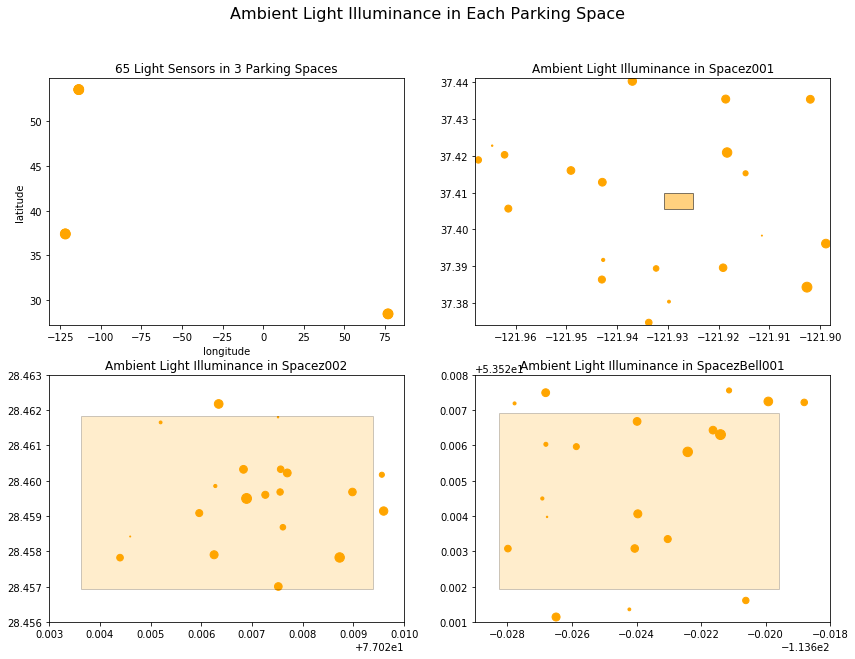

In [176]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))
fig.suptitle('Ambient Light Illuminance in Each Parking Space', fontsize=16)

axes[0,0].scatter(df_AmbientLight['longitude'], df_AmbientLight['latitude'], s=df_AmbientLight['illuminance'], color='orange')
axes[0,0].set_title('65 Light Sensors in 3 Parking Spaces')
axes[0,0].set_xlabel('longitude')
axes[0,0].set_ylabel('latitude')

axes[0,1].scatter(df_AmbientLight['longitude'], df_AmbientLight['latitude'], s=df_AmbientLight['illuminance'], color='orange')
axes[0,1].set_title('Ambient Light Illuminance in Spacez001')
axes[0,1].set_xlim([-121.968,-121.898])
axes[0,1].set_ylim([37.374,37.441]) 
drawParkingSpace(df_spaces['geoPoint'][1], axes[0,1], 0.5)

axes[1,0].scatter(df_AmbientLight['longitude'], df_AmbientLight['latitude'], s=df_AmbientLight['illuminance'], color='orange')
axes[1,0].set_title('Ambient Light Illuminance in Spacez002')
axes[1,0].set_xlim([77.023,77.03])
axes[1,0].set_ylim([28.456,28.463])
drawParkingSpace(df_spaces['geoPoint'][2], axes[1,0], 0.2)

axes[1,1].scatter(df_AmbientLight['longitude'], df_AmbientLight['latitude'], s=df_AmbientLight['illuminance'], color='orange')
axes[1,1].set_title('Ambient Light Illuminance in SpacezBell001')
axes[1,1].set_xlim([-113.629,-113.618])
axes[1,1].set_ylim([53.521,53.528])
drawParkingSpace(df_spaces['geoPoint'][3], axes[1,1], 0.2)

plt.show()

## AirQuality Sensor
* Let's skip Noise and Temperature sensors, because they have the same structure as Light. 
* Let's focus on AirQuality, which has more abundant columns, like co2, no2, pm2p5, pm10, so2, o3

In [188]:
df_AirQuality = df_sensors[df_sensors['sensorType']=='AirQuality']
df_AirQuality['co2'] = [airQuality['reading']['co2']['value'] 
                                  for airQuality in df_AirQuality['airQuality']]
df_AirQuality['no2'] = [airQuality['reading']['no2']['value'] 
                                  for airQuality in df_AirQuality['airQuality']]
df_AirQuality['pm2p5'] = [airQuality['reading']['pm2p5']['value'] 
                                  for airQuality in df_AirQuality['airQuality']]
df_AirQuality['pm10'] = [airQuality['reading']['pm10']['value'] 
                                  for airQuality in df_AirQuality['airQuality']]
df_AirQuality['so2'] = [airQuality['reading']['so2']['value'] 
                                  for airQuality in df_AirQuality['airQuality']]
df_AirQuality['o3'] = [airQuality['reading']['o3']['value'] 
                                  for airQuality in df_AirQuality['airQuality']]
delNaNColumns(df_AirQuality)
df_AirQuality.head()

c:\users\jkuang\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
c:\users\jkuang\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\jkuang\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,deviceType,label,lastUpdated,providerDetails,sensorCustomerId,sensorType,sid,thirdPartyId,longitude,latitude,co2,no2,pm2p5,pm10,so2,o3
0,Sensor,AQ1,2017-01-10T13:11:34.878Z,"{'provider': 'simulator', 'providerId': 'udvdd...",SDPCustomer_500050,AirQuality,Simulated__DEVNET002__AQ1,AQ1,-121.947893,37.402352,8.0,1.0,3.0,10.0,2.0,4.0
1,Sensor,AQ10,2017-01-10T13:11:34.878Z,"{'provider': 'simulator', 'providerId': 'udvdd...",SDPCustomer_500050,AirQuality,Simulated__DEVNET002__AQ10,AQ10,-121.939693,37.418143,2.0,1.0,10.0,6.0,2.0,10.0
2,Sensor,AQ11,2017-01-10T13:11:34.878Z,"{'provider': 'simulator', 'providerId': 'udvdd...",SDPCustomer_500050,AirQuality,Simulated__DEVNET002__AQ11,AQ11,-121.943929,37.398077,5.0,1.0,8.0,2.0,2.0,7.0
3,Sensor,AQ12,2017-01-10T13:11:34.878Z,"{'provider': 'simulator', 'providerId': 'udvdd...",SDPCustomer_500050,AirQuality,Simulated__DEVNET002__AQ12,AQ12,-121.923485,37.402594,1.0,1.0,4.0,7.0,2.0,7.0
4,Sensor,AQ13,2017-01-10T13:11:34.878Z,"{'provider': 'simulator', 'providerId': 'udvdd...",SDPCustomer_500050,AirQuality,Simulated__DEVNET002__AQ13,AQ13,-121.929676,37.403726,1.0,1.0,6.0,9.0,2.0,8.0
